# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress
import os


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | callao
Processing Record 2 of Set 1 | qamdo
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | tazovsky
Processing Record 5 of Set 1 | st. john's
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | rongelap
Processing Record 8 of Set 1 | kulhudhuffushi
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | karatas
Processing Record 11 of Set 1 | motygino
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | puerto colombia
Processing Record 16 of Set 1 | fort st. john
Processing Record 17 of Set 1 | kalibo (poblacion)
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | visakhapatnam
Processing Record 20 of Set 1 | musay'id
City not found. Skipping...
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,callao,-12.0667,-77.1500,20.81,89,87,3.23,PE,1713792106
1,qamdo,31.1667,97.2333,6.87,39,54,2.20,CN,1713792107
2,edinburgh of the seven seas,-37.0676,-12.3116,16.75,83,25,7.59,SH,1713792108
3,tazovsky,67.4667,78.7000,-10.12,93,100,4.67,RU,1713792109
4,st. john's,47.5649,-52.7093,5.52,77,100,3.15,CA,1713792110


In [6]:
# Export the City_Data into a csv
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,callao,-12.0667,-77.1500,20.81,89,87,3.23,PE,1713792106
1,qamdo,31.1667,97.2333,6.87,39,54,2.20,CN,1713792107
2,edinburgh of the seven seas,-37.0676,-12.3116,16.75,83,25,7.59,SH,1713792108
3,tazovsky,67.4667,78.7000,-10.12,93,100,4.67,RU,1713792109
4,st. john's,47.5649,-52.7093,5.52,77,100,3.15,CA,1713792110


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

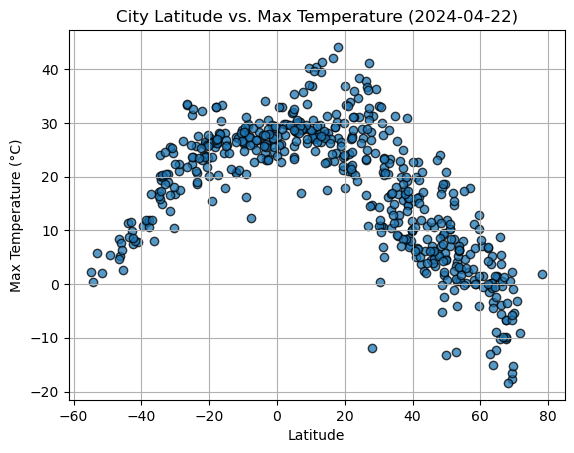

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Assuming current_date is a Unix timestamp
timestamp = city_data_df.iloc[0]["Date"]

# Convert the timestamp to a numeric format (float or int)
timestamp_numeric = float(timestamp)  # Convert to float assuming it's in seconds

# Convert the timestamp to a datetime object
date_object = datetime.datetime.fromtimestamp(timestamp_numeric)

# Convert the datetime object to a human-readable format
current_date = date_object.strftime("%Y-%m-%d")
#current_date = city_data_df.iloc[0]["Date"]
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

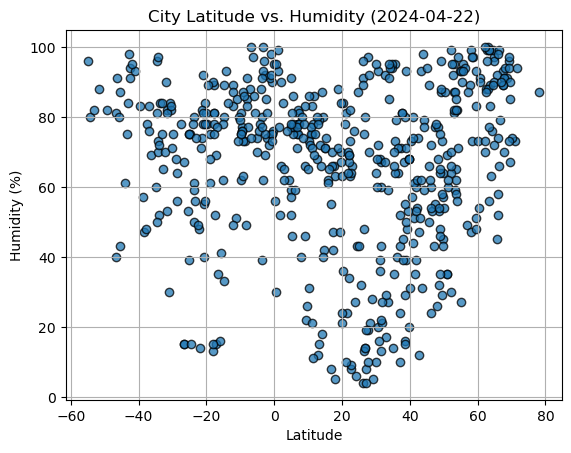

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

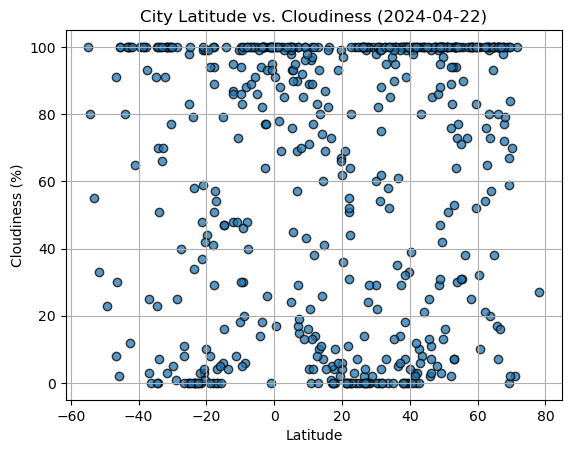

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

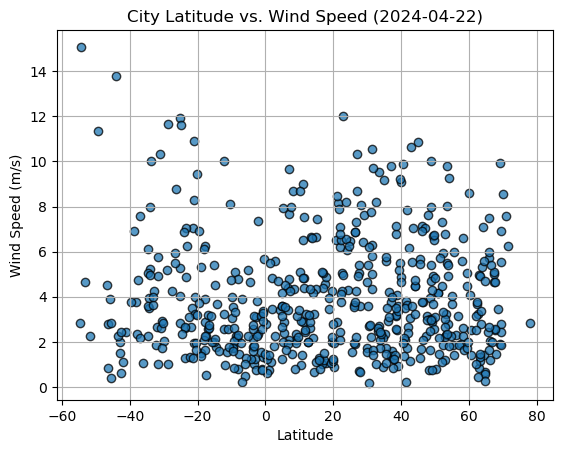

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Add title and labels to the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
  
    
    # Print r square value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()



In [13]:

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qamdo,31.1667,97.2333,6.87,39,54,2.20,CN,1713792107
3,tazovsky,67.4667,78.7000,-10.12,93,100,4.67,RU,1713792109
4,st. john's,47.5649,-52.7093,5.52,77,100,3.15,CA,1713792110
6,rongelap,11.1635,166.8941,27.86,75,100,6.50,MH,1713792111
7,kulhudhuffushi,6.6221,73.0700,30.20,75,69,4.41,MV,1713792112


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,callao,-12.0667,-77.1500,20.81,89,87,3.23,PE,1713792106
2,edinburgh of the seven seas,-37.0676,-12.3116,16.75,83,25,7.59,SH,1713792108
5,waitangi,-43.9535,-176.5597,11.32,61,80,13.78,NZ,1713792111
8,west island,-12.1568,96.8225,27.27,83,48,10.01,CC,1713792113
11,grytviken,-54.2811,-36.5092,0.30,80,80,15.08,GS,1713792116


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7229757388246203


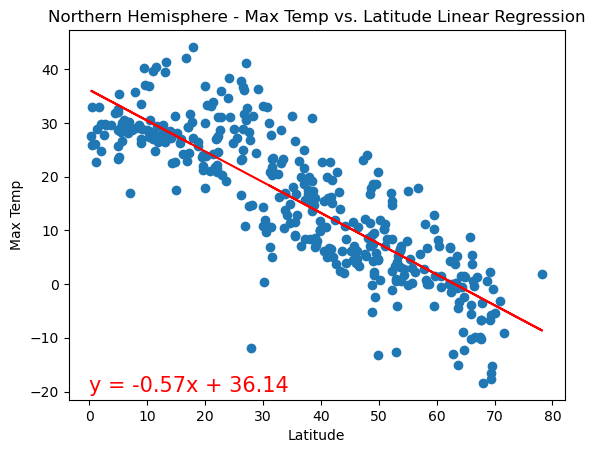

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp", (0, -20))

The r-value is: 0.6070513221727725


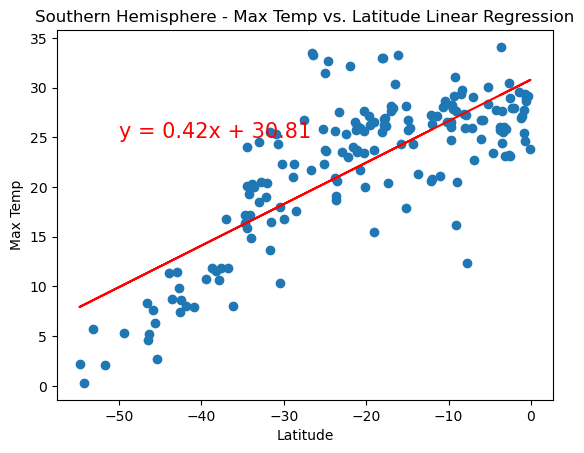

In [16]:
# Linear regression on Southern Hemisphere

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp", (-50, 25))


**Discussion about the linear relationship:**
# In the Northern Hemisphere, there's a negative correlation between latitude and maximum temperature, indicating that as latitude increases (moving away from the equator), the temperature tends to decrease.
# In the Southern Hemisphere, there's a positive correlation, indicating that as latitude decreases (closer to the equator
# the temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05748633630529824


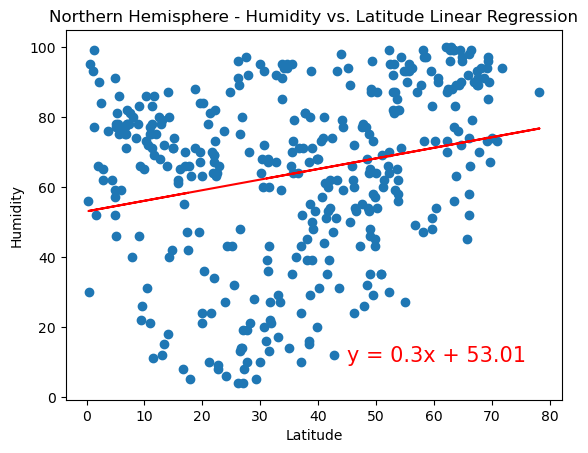

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity", (45, 10))

The r-value is: 0.005924138962163924


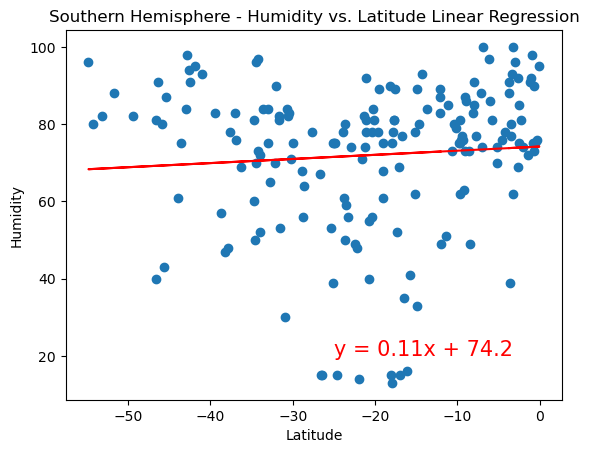

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity", (-25, 20))

**Discussion about the linear relationship:**# There doesn't seem to be a strong linear relationship between latitude and humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.019727651974756313


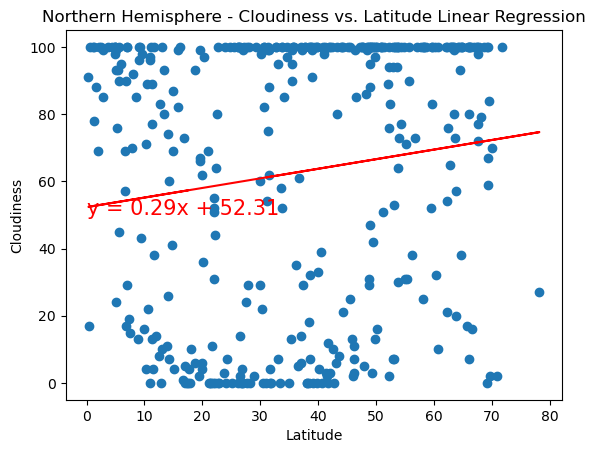

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness", (0, 50))


The r-value is: 0.0139190884820741


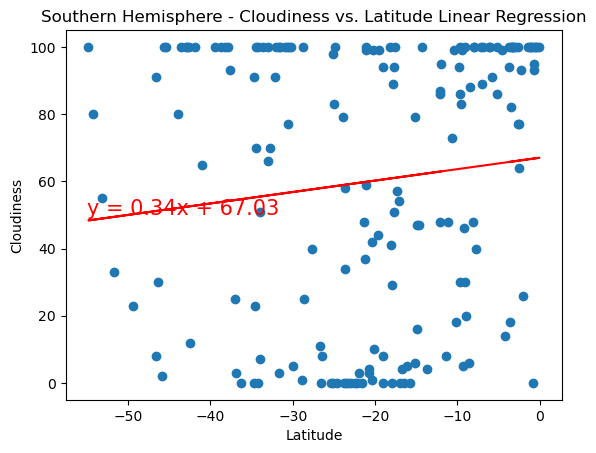

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness", (-55, 50))

**Discussion about the linear relationship:** 
# There doesn't seem to be a strong linear relationship between latitude and cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 3.0527924525021567e-06


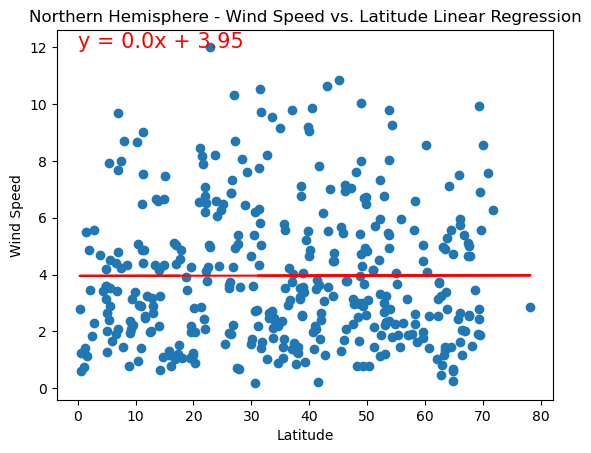

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed", (0, 12))

The r-value is: 0.07725045732542238


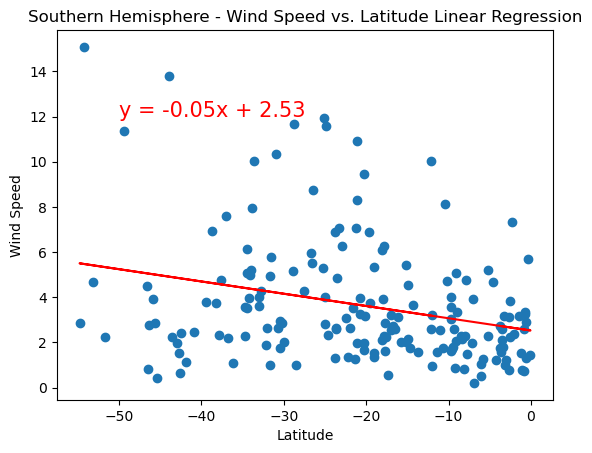

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** # There doesn't seem to be a strong linear relationship between latitude and wind speed in either hemisphere.